## Imports

In [1]:
# Standard
import json
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Scoring
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump, load


## Data

In [2]:
file_name = 'train_gb'
train = pd.read_pickle(f'..\\processed_data\\{file_name}.pki')

file_name = 'test_gb'
test = pd.read_pickle(f'..\\processed_data\\{file_name}.pki')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
205,LP001692,0,0,0,1,0,1.0,1,1,4408.0,0.333333,4407.666667
238,LP001790,0,0,1,0,0,1.0,0,1,3812.0,0.311111,3811.688889
25,LP001066,1,1,0,0,1,1.0,1,1,9560.0,0.530556,9559.469444
527,LP002706,1,1,1,1,0,0.0,1,1,6715.0,0.447222,6714.552778
256,LP001849,1,0,0,1,0,0.0,0,0,6045.0,0.319444,6044.680556


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,BalanceIncome
124,LP001439,1,1,0,1,0,1.0,0,1,6314.0,0.538889,6313.461111
414,LP002335,0,1,0,1,0,0.0,1,0,5386.0,0.494444,5385.505556
79,LP001264,1,1,3,1,1,1.0,1,1,5499.0,0.361111,5498.638889
165,LP001574,1,1,0,0,0,1.0,0,1,6873.0,0.505556,6872.494444
295,LP001949,1,1,3,0,0,1.0,2,1,5666.0,0.305556,5665.694444


In [5]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = train['Loan_Status']
print(X.head())
print(y.head())

     Gender  Married Dependents  Education  Self_Employed  Credit_History  \
205       0        0          0          1              0             1.0   
238       0        0          1          0              0             1.0   
25        1        1          0          0              1             1.0   
527       1        1          1          1              0             0.0   
256       1        0          0          1              0             0.0   

     Property_Area  TotalIncome       EMI  BalanceIncome  
205              1       4408.0  0.333333    4407.666667  
238              0       3812.0  0.311111    3811.688889  
25               1       9560.0  0.530556    9559.469444  
527              1       6715.0  0.447222    6714.552778  
256              0       6045.0  0.319444    6044.680556  
205    1
238    1
25     1
527    1
256    0
Name: Loan_Status, dtype: int32


In [6]:
y.value_counts()

Loan_Status
1    304
0    143
Name: count, dtype: int64

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

## Hyper-parameter training MLP

In [75]:
# Find the Best Model
param_grid = {
    'hidden_layer_sizes': [2, 4, 5, 10, 20, 40],
    'activation': ['tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [1e-7, .000001, .00001, .0001],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 400, 800]
}

grid_search = GridSearchCV(MLPClassifier(), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [1e-07, 1e-06, 1e-05, 0.0001],
                         'hidden_layer_sizes': [2, 4, 5, 10, 20, 40],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 200, 400, 800],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='f1_weighted', verbose=5)

In [76]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': 4,
 'learning_rate': 'invscaling',
 'max_iter': 800,
 'solver': 'adam'}

In [77]:
model = grid_search.best_estimator_

In [21]:
file_name = 'mlp_model'
dump(model, f'..\\ml_models\\{file_name}.joblib')

['..\\ml_models\\mlp_model.joblib']

## Scoring

In [78]:
X_test, y_test = test.drop(columns=['Loan_ID', 'Loan_Status']), test['Loan_Status']

In [79]:
X_test_scaled = scaler.fit_transform(X_test)

In [80]:
y_pred = model.predict(X_test_scaled)

In [81]:
f1_score(y_pred = y_pred, y_true=y_test)

0.8953974895397491

In [82]:
accuracy_score(y_pred = y_pred, y_true=y_test)

0.8376623376623377

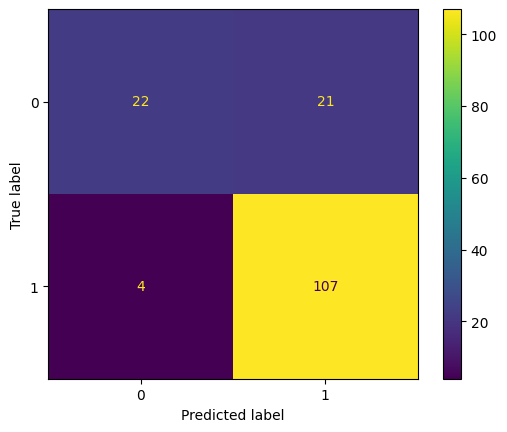

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred = y_pred, y_true=y_test), display_labels=model.classes_)
disp.plot()
plt.show()